#**BUSINESS UNDERSTANDING**

##Business Objective

Proyek ini bertujuan membantu perusahaan distribusi alat berat untuk memahami dan mengelompokkan pelanggan berdasarkan kebiasaan pembelian mereka. Dengan membagi pelanggan ke dalam beberapa kelompok, perusahaan bisa membuat strategi pemasaran yang lebih tepat dan fokus pada pelanggan yang paling penting.

Selain itu, proyek ini juga menyediakan dashboard yang menampilkan data penjualan dan produk terlaris secara mudah dan cepat. Dengan begitu, tim pemasaran dan operasional bisa mengambil keputusan yang lebih baik dan lebih cepat berdasarkan data yang ada serta dapat mengelola produk serta stok dengan lebih baik.

Tujuannya adalah agar perusahaan bisa meningkatkan pendapatan dan efisiensi kerja dengan cara yang lebih terencana dan berbasis data.

##Assess Situation

Perusahaan saat ini sudah memiliki data transaksi penjualan yang berisi informasi seperti nama pelanggan, tanggal pembelian, jumlah unit yang dibeli, dan total nilai transaksi. Namun, data ini belum digunakan secara maksimal untuk memahami pola dan karakteristik pelanggan.

Banyak variasi dalam cara pelanggan berbelanja, seperti seberapa sering mereka membeli, kapan terakhir kali membeli, dan berapa besar nilai pembelian mereka. Karena itu, perusahaan belum bisa mengelompokkan pelanggan secara efektif untuk membantu strategi pemasaran dan pengelolaan stok.

Selain itu, informasi mengenai produk yang paling laris dan memberikan kontribusi pendapatan terbesar belum dianalisis secara detail. Padahal, data tersebut penting untuk mengatur stok dan merencanakan pengadaan barang agar lebih efisien.

##Data Mining Goals

Tujuan dari data mining dalam proyek ini adalah untuk membangun model segmentasi pelanggan berdasarkan pendekatan RFM (Recency, Frequency, Monetary). Segmentasi ini dilakukan menggunakan metode clustering seperti KMeans dan Agglomerative Clustering untuk mengelompokkan pelanggan ke dalam segmen-segmen yang memiliki karakteristik perilaku pembelian yang serupa. Dengan segmentasi ini, perusahaan dapat memahami pola pembelian pelanggan secara lebih mendalam dan menyusun strategi yang lebih tepat dalam pemasaran, penawaran produk, serta pengelolaan hubungan pelanggan. Selain itu, data mining juga bertujuan untuk mengidentifikasi produk-produk dengan kontribusi penjualan yang tinggi agar perusahaan dapat mengambil keputusan yang lebih baik dalam pengelolaan stok dan perencanaan distribusi. Pendekatan ini diharapkan dapat membantu perusahaan dalam meningkatkan efisiensi operasional dan mendukung pencapaian tujuan bisnis jangka panjang.

##Project Plan

Proyek dimulai dari tahap Business Understanding, yaitu dengan memahami kebutuhan perusahaan dalam mengelompokkan pelanggan berdasarkan perilaku pembelian guna menyusun strategi pemasaran dan pengelolaan distribusi yang lebih efektif. Selanjutnya, tahap Data Understanding dilakukan untuk mengenali struktur data transaksi yang tersedia, mengevaluasi kelengkapan serta kualitas data seperti informasi pelanggan, nilai transaksi, dan waktu pembelian.

Pada tahap Data Preparation, dilakukan perhitungan nilai Recency, Frequency, dan Monetary untuk setiap pelanggan. Data ini kemudian dinormalisasi agar memiliki skala yang sebanding sebelum digunakan dalam pemodelan. Tahap ini juga mencakup pembersihan data yang tidak relevan atau duplikat.

Tahap Modeling dilakukan dengan menerapkan algoritma clustering, yaitu KMeans dan Agglomerative Clustering, untuk membentuk klaster pelanggan berdasarkan data RFM yang telah diproses. Pemilihan jumlah klaster didasarkan pada pendekatan evaluasi seperti Elbow Method dan Silhouette Score.

Tahap Evaluation bertujuan untuk menilai kualitas segmentasi yang dihasilkan dari masing-masing model. Hasil dari proses ini digunakan untuk memilih model terbaik yang mampu mengelompokkan pelanggan secara bermakna sesuai kebutuhan bisnis.

Tahap terakhir adalah Deployment, di mana hasil segmentasi pelanggan digunakan dalam bentuk pelabelan segmen yang relevan dan disiapkan untuk diintegrasikan ke dalam sistem internal perusahaan atau dashboard interaktif. Hasil ini akan digunakan oleh tim pemasaran, operasional, dan manajemen dalam merumuskan strategi dan pengambilan keputusan berbasis data.

#**DATA UNDERSTANDING**

##Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

##Collect Initial Data

In [ ]:
df = pd.read_csv('Data Trazor.csv')
df

,Date,Profit Center Name,Sold to Party Name,Mat Group Name,Product Type,Quantity,Material,Material Name,Mat Type Name,Sum of Revenue
0,01/20/2025,Balikpapan,PT PAMAPERSADA NUSANTARA,Fabrication,Part - VHS/FPA/Cons,3,PA0401-C4000000,WINCH EXTENSION TOWER LAMP,Part,643100.0
1,01/30/2025,Balikpapan,PT PAMAPERSADA NUSANTARA,Mechanical,Part - VHS/FPA/Cons,1,VMTG44-30001,HAND WINCH BHW 2600 TIGER,Part,7445030.0
2,01/20/2025,Balikpapan,PT PAMAPERSADA NUSANTARA,Hydraulic,Part - VHS/FPA/Cons,1,VHPA04-10003-18,BUSHING,Part,483040.0
3,01/30/2025,Balikpapan,PT PAMAPERSADA NUSANTARA,Fabrication,Part - VHS/FPA/Cons,6,T17401-B1410000,RUBBER END SST74,Part,29371680.0
4,01/18/2025,Balikpapan,PT PAMAPERSADA NUSANTARA,Hydraulic,Part - VHS/FPA/Cons,6,14020030,STRAPS FOR OILTANK 304 X 519,Part,1614420.0
...,...,...,...,...,...,...,...,...,...,...
609,03/28/2025,Balikpapan,UNITED TRACTORS TBK,SCANIA,Ready Core,1,SCH-2132523,ENG/DC13/P410 (SURCHARGE),Surcharge Material,21214629.0
610,03/28/2025,Balikpapan,UNITED TRACTORS TBK,SCANIA,Ready Core,1,SCH-2444695,GBX/R580/GRSO925 (SURCHARGE),Surcharge Material,40650095.0
611,03/28/2025,Balikpapan,UNITED TRACTORS TBK,SCANIA,Ready Core,1,SCH-2117716,DIF/P410/RBP835 (SURCHARGE),Surcharge Material,39891057.0
612,03/28/2025,Balikpapan,UNITED TRACTORS TBK,SCANIA,Ready Core,1,SCH-1734125,ENG/R580/DC1603 (SURCHARGE),Surcharge Material,341693958.0


##Describe Data

###Informasi Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                614 non-null    object 
 1   Profit Center Name  614 non-null    object 
 2   Sold to Party Name  614 non-null    object 
 3   Mat Group Name      614 non-null    object 
 4   Product Type        614 non-null    object 
 5   Quantity            614 non-null    int64  
 6   Material            614 non-null    object 
 7   Material Name       614 non-null    object 
 8   Mat Type Name       614 non-null    object 
 9   Sum of Revenue      614 non-null    float64
dtypes: float64(1), int64(1), object(8)
memory usage: 48.1+ KB


Berdasarkan data di atas dapat diketahui bahwa dataset tersebut memiliki 10 kolom dan 614 baris.

1. Date (object)
```
Tanggal saat transaksi dilakukan.
Tipe data: object (string)
Jumlah Baris: 614
Berfungsi sebagai penanda waktu terjadinya transaksi.
```
2. Profit Center Name (object)
```
Nama unit atau cabang yang menangani transaksi.
Tipe data: object (string)
Jumlah Baris: 614
Mewakili lokasi atau divisi tempat transaksi terjadi, misalnya “Balikpapan”.
```
3. Sold to Party Name (object)
```
Nama perusahaan atau pelanggan yang membeli produk.
Tipe data: object (string)
Jumlah Baris: 614
Menjadi identifikasi pihak pembeli dalam transaksi.
```
4. Mat Group Name (object)
```
Kelompok atau kategori material yang dijual.
Tipe data: object (string)
Jumlah Baris: 614
Membantu mengelompokkan produk berdasarkan jenis material seperti “Fabrication” atau “Mechanical”.
```
5. Product Type (object)
```
Jenis atau tipe produk berdasarkan fungsi atau bentuknya.
Tipe data: object (string)
Jumlah Baris: 614
Digunakan untuk membedakan produk seperti “Part - VHS/FPA/Cons”.
```
6. Quantity (int64)
```
Jumlah unit barang yang dijual dalam transaksi.
Tipe data: Integer
Jumlah Baris: 614
Menunjukkan volume penjualan dalam satuan unit.
```
7. Material (object)
```
Kode unik material atau produk yang dijual.
Tipe data: object (string)
Jumlah Baris: 614
Berfungsi sebagai pengenal unik tiap produk dalam sistem.
```
8. Material Name (object)
```
Nama lengkap dari material yang dijual.
Tipe data: object (string)
Jumlah Baris: 614
Deskripsi verbal dari kode material, untuk interpretasi pengguna.
```
9. Mat Type Name (object)
```
Kategori tipe material dalam sistem inventaris.
Tipe data: object (string)
Jumlah Baris: 614
Digunakan untuk klasifikasi internal produk.
```
10. Sum of Revenue (float64)
```
Total pendapatan dari transaksi penjualan.
Tipe data: float
Jumlah Baris: 614
Menjadi variabel target untuk model prediksi revenue.
```

##Informasi Lanjutan

In [ ]:
df.describe()

,Quantity,Sum of Revenue
count,614.000000,6.140000e+02
mean,5.434853,1.095615e+07
std,7.664551,3.025770e+07
min,1.000000,7.046382e+02
25%,1.000000,4.829440e+05
50%,3.000000,1.866935e+06
75%,6.000000,1.086100e+07
max,96.000000,3.416940e+08


Berdasarkan hasil analisis statistik deskriptif, berikut ini adalah penjelasan untuk dua kolom numerik yaitu Quantity dan Sum of Revenue:

1. Quantity (int64)
```
Kolom ini menunjukkan jumlah unit barang yang dijual dalam setiap transaksi.
Jumlah data (count): 614 baris
Nilai minimum: 1 unit
Nilai maksimum: 96 unit
Rata-rata (mean): sekitar 5.43 unit per transaksi
Standar deviasi (std): 7.66, menunjukkan variasi jumlah unit yang cukup tinggi
Kuartil 1 (25%): 1 unit
Median (50%): 3 unit
Kuartil 3 (75%): 6 unit
```
2. Sum of Revenue (float64)
```
Kolom ini menunjukkan total pendapatan (revenue) yang dihasilkan dari setiap transaksi.
Jumlah data (count): 614 baris
Nilai minimum: sekitar Rp 704 ribu
Nilai maksimum: sekitar Rp 341,6 juta
Rata-rata (mean): sekitar Rp 10,96 juta
Standar deviasi (std): sekitar Rp 30,26 juta, menunjukkan adanya perbedaan besar antar transaksi
Kuartil 1 (25%): sekitar Rp 482.944
Median (50%): sekitar Rp 1,87 juta
Kuartil 3 (75%): sekitar Rp 10,86 juta
```

##Exploratory Data Analysis

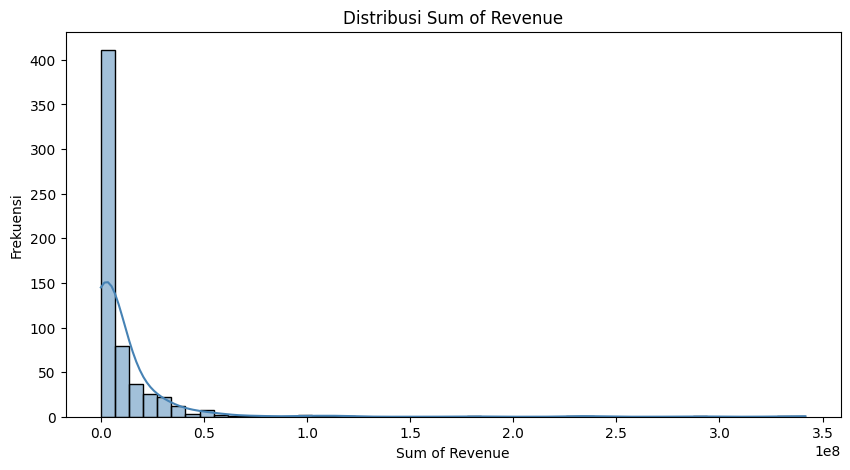

In [ ]:
# Distribusi Sum of Revenue
plt.figure(figsize=(10,5))
sns.histplot(df['Sum of Revenue'], bins=50, kde=True, color='steelblue')
plt.title('Distribusi Sum of Revenue')
plt.xlabel('Sum of Revenue')
plt.ylabel('Frekuensi')
plt.show()

Berdasarkan visualisasi distribusi Sum of Revenue, terlihat bahwa data memiliki pola sebaran yang condong ke kanan (right-skewed). Sebagian besar transaksi menghasilkan revenue dalam jumlah kecil, sementara hanya sedikit transaksi yang menghasilkan revenue sangat tinggi. Hal ini menunjukkan adanya outlier dan ketidakseimbangan distribusi.

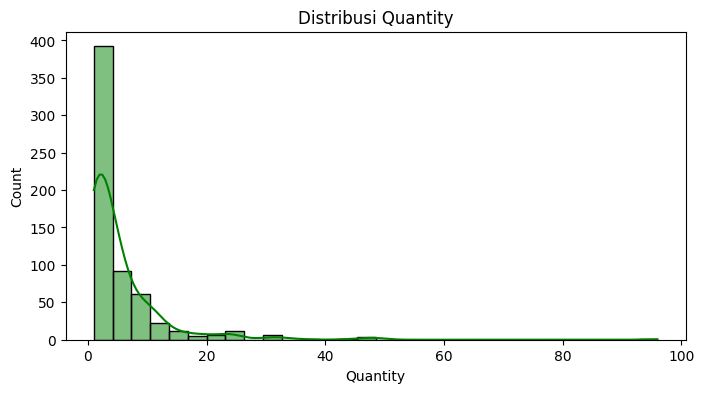

In [ ]:
# Distribusi Quantity
plt.figure(figsize=(8,4))
sns.histplot(df['Quantity'], bins=30, kde=True, color='green')
plt.title('Distribusi Quantity')
plt.show()

Berdasarkan visualisasi distribusi Quantity, data terlihat sangat condong ke kanan (right-skewed). Sebagian besar transaksi memiliki jumlah pembelian yang rendah, yaitu di bawah 10 unit. Hanya sedikit transaksi yang memiliki jumlah pembelian tinggi, dan jumlahnya menurun drastis seiring meningkatnya nilai quantity. Pola ini menunjukkan bahwa mayoritas transaksi melibatkan pembelian dalam jumlah kecil, sementara pembelian dalam jumlah besar tergolong jarang

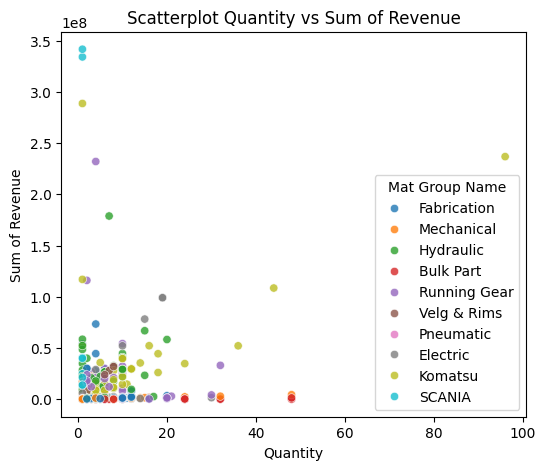

In [ ]:
# Scatter plot Quantity vs Revenue
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Quantity', y='Sum of Revenue', data=df, hue='Mat Group Name', alpha=0.8)
plt.title('Scatterplot Quantity vs Sum of Revenue')
plt.show()

Berdasarkan visualisasi diatas dapat disimpulkan bahwa sebagian besar transaksi memiliki quantity dan revenue yang rendah. Namun, ada beberapa transaksi dengan revenue tinggi meskipun quantity-nya kecil, menandakan adanya produk bernilai tinggi. Pola warna berdasarkan kelompok material juga menunjukkan bahwa jenis produk turut memengaruhi besar kecilnya revenue, bukan hanya jumlah unit yang dijual.

<ipython-input-8-2e747365c1f2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_revenue.index, y=grouped_revenue.values, palette='viridis')


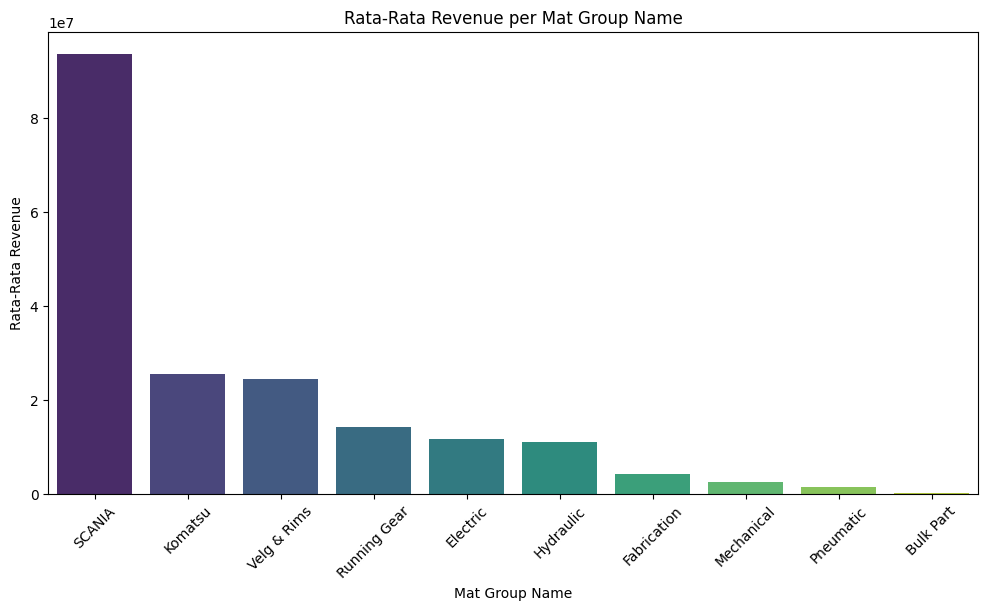

In [ ]:
# Rata-rata Revenue per Mat Group
plt.figure(figsize=(12, 6))
grouped_revenue = df.groupby('Mat Group Name')['Sum of Revenue'].mean().sort_values(ascending=False)
sns.barplot(x=grouped_revenue.index, y=grouped_revenue.values, palette='viridis')
plt.xticks(rotation=45)
plt.ylabel('Rata-Rata Revenue')
plt.title('Rata-Rata Revenue per Mat Group Name')
plt.show()

Berdasarkan visualsiasi diatas dapat ditunjukkan bahwa kelompok produk SCANIA memiliki rata-rata revenue tertinggi dibandingkan kelompok lainnya, terpaut jauh di atas kelompok kedua dan ketiga yaitu Komatsu serta Velg & Rims. Sementara itu, kelompok seperti Pneumatic dan Bulk Part memiliki rata-rata revenue terendah. Visualisasi ini menunjukkan bahwa tidak semua kelompok material memberikan kontribusi pendapatan yang sama besar, sehingga bisa menjadi dasar untuk prioritas strategi penjualan dan fokus bisnis.

##Verify Data Quality

###Missing Values

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
Date,0.0
Profit Center Name,0.0
Sold to Party Name,0.0
Mat Group Name,0.0
Product Type,0.0
Quantity,0.0
Material,0.0
Material Name,0.0
Mat Type Name,0.0
Sum of Revenue,0.0


Berdasarkan pengecekkan di atas yang menunjukkan persentase missing value dalam dataset, dapat disimpulkan bahwa tidak ada nilai yang hilang pada semua kolom. Hal ini menunjukkan bahwa dataset bersih dari missing value dan dapat dilanjutkan ke proses selanjutnya

###Duplicated Values

In [ ]:
df[df.duplicated()]

Berdasarkan hasil pengecekan nilai duplikat, ditemukan bahwa terdapat beberapa baris data yang memiliki nilai identik di seluruh kolom. Duplikasi ini mencakup informasi seperti tanggal transaksi, nama pelanggan, nama material, serta nilai revenue yang sama persis.

###Outliers Values

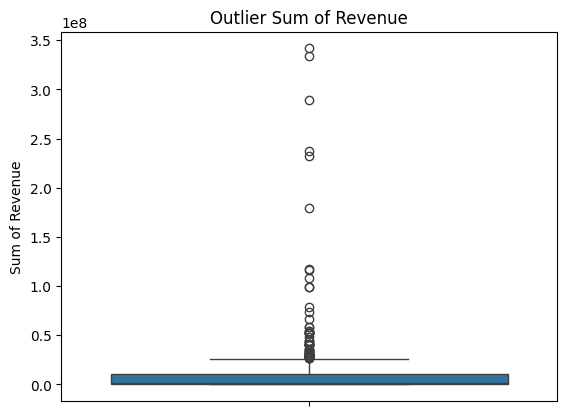

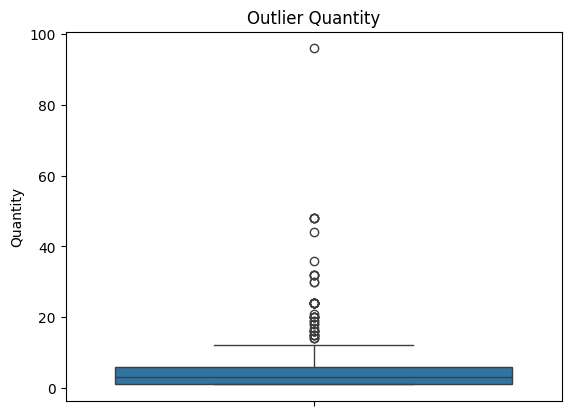

In [ ]:
sns.boxplot(df['Sum of Revenue'])
plt.title("Outlier Sum of Revenue")
plt.show()

sns.boxplot(df['Quantity'])
plt.title("Outlier Quantity")
plt.show()
plt.show()

Berdasarkan hasil visualisasi boxplot, ditemukan bahwa adanya outlier pada kolom Sum of Revenue dan Quantity. Sebagian besar data berada di rentang rendah, namun terdapat beberapa nilai ekstrem yang jauh lebih tinggi dari mayoritas.

# **DATA PREPARATION**

##Data Cleaning

###Penanganan Missing Values

Pada tahap ini, tidak ditemukan adanya missing values pada dataset berdasarkan hasil pengecekan sebelumnya. Oleh karena itu, tidak diperlukan penanganan khusus terhadap data yang hilang dan proses dapat dilanjutkan ke tahap berikutnya.

###Penanganan Duplicated Values

In [ ]:
df = df.drop_duplicates()
df

,Date,Profit Center Name,Sold to Party Name,Mat Group Name,Product Type,Quantity,Material,Material Name,Mat Type Name,Sum of Revenue
0,01/20/2025,Balikpapan,PT PAMAPERSADA NUSANTARA,Fabrication,Part - VHS/FPA/Cons,3,PA0401-C4000000,WINCH EXTENSION TOWER LAMP,Part,643100.0
1,01/30/2025,Balikpapan,PT PAMAPERSADA NUSANTARA,Mechanical,Part - VHS/FPA/Cons,1,VMTG44-30001,HAND WINCH BHW 2600 TIGER,Part,7445030.0
2,01/20/2025,Balikpapan,PT PAMAPERSADA NUSANTARA,Hydraulic,Part - VHS/FPA/Cons,1,VHPA04-10003-18,BUSHING,Part,483040.0
3,01/30/2025,Balikpapan,PT PAMAPERSADA NUSANTARA,Fabrication,Part - VHS/FPA/Cons,6,T17401-B1410000,RUBBER END SST74,Part,29371680.0
4,01/18/2025,Balikpapan,PT PAMAPERSADA NUSANTARA,Hydraulic,Part - VHS/FPA/Cons,6,14020030,STRAPS FOR OILTANK 304 X 519,Part,1614420.0
...,...,...,...,...,...,...,...,...,...,...
609,03/28/2025,Balikpapan,UNITED TRACTORS TBK,SCANIA,Ready Core,1,SCH-2132523,ENG/DC13/P410 (SURCHARGE),Surcharge Material,21214629.0
610,03/28/2025,Balikpapan,UNITED TRACTORS TBK,SCANIA,Ready Core,1,SCH-2444695,GBX/R580/GRSO925 (SURCHARGE),Surcharge Material,40650095.0
611,03/28/2025,Balikpapan,UNITED TRACTORS TBK,SCANIA,Ready Core,1,SCH-2117716,DIF/P410/RBP835 (SURCHARGE),Surcharge Material,39891057.0
612,03/28/2025,Balikpapan,UNITED TRACTORS TBK,SCANIA,Ready Core,1,SCH-1734125,ENG/R580/DC1603 (SURCHARGE),Surcharge Material,341693958.0


Setelah dilakukan pengecekan sebelumnya, ditemukan bahwa terdapat beberapa baris data yang duplikat, yaitu memiliki nilai yang sama persis pada seluruh kolom. Untuk mencegah terjadinya bias dalam analisis dan pemodelan, data duplikat tersebut telah dihapus menggunakan fungsi drop_duplicates(). Hasilnya, jumlah baris dalam dataset berkurang dari 614 menjadi 586 baris, yang menandakan bahwa terdapat 28 baris data duplikat yang berhasil dihapus. Dengan demikian, data yang digunakan untuk analisis selanjutnya sudah bersih dari duplikasi.

###Penanganan Outliers Values

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers) / len(df)) * 100
    results.append({'Kolom': col, 'Persentase Outliers': round(percent_outliers, 2)})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

from IPython.display import display
display(results_df)

Kolom,Persentase Outliers
Quantity,8.02
Sum of Revenue,10.92


Berdasarkan hasil deteksi, ditemukan outlier pada kolom Quantity (8,02%) dan Sum of Revenue (10,92%). Namun, karena outlier tersebut mencerminkan kondisi asli di lapangan seperti transaksi bernilai besar atau pembelian dalam jumlah tinggi maka diputuskan untuk tidak menghapusnya.

###Penanganan Inconsistency Values

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

<ipython-input-14-4ac1f8d99197>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Kode ini digunakan untuk mengubah kolom Date yang awalnya bertipe object (string) menjadi format datetime.

##Construct Data

###Recency

In [ ]:
snapshot_date = df['Date'].max() + pd.Timedelta(days=1)

recency_df = df.groupby('Sold to Party Name')['Date'].max().reset_index()
recency_df['Recency'] = (snapshot_date - recency_df['Date']).dt.days
recency_df = recency_df[['Sold to Party Name', 'Recency']]

Kolom Recency ditambahkan karena bertujuan untuk mengetahui seberapa baru pelanggan terakhir kali melakukan pembelian. Ini membantu mengukur potensi keterlibatan pelanggan saat ini.

##Frequency

In [ ]:
frequency_df = df.groupby('Sold to Party Name')['Date'].count().reset_index()
frequency_df.rename(columns={'Date': 'Frequency'}, inplace=True)

Kolom Frequency ditambahkan untuk menunjukkan seberapa sering pelanggan melakukan pembelian, yang mencerminkan tingkat loyalitasnya.

###Monetary

In [ ]:
monetary_df = df.groupby('Sold to Party Name')['Sum of Revenue'].sum().reset_index()
monetary_df.rename(columns={'Sum of Revenue': 'Monetary'}, inplace=True)

Kolom Monetary ditambahkan agar kita mengetahui berapa besar kontribusi finansial pelanggan terhadap pendapatan perusahaan.

In [ ]:
rfm_df = recency_df.merge(frequency_df, on='Sold to Party Name').merge(monetary_df, on='Sold to Party Name')
rfm_df

,Sold to Party Name,Recency,Frequency,Monetary
0,PT ANTAREJA MAHADA MAKMUR,41,1,1.458000e+06
1,PT BERKAT ANUGERAH SEJAHTERA,46,5,1.928848e+07
2,PT BINA PERTIWI,59,1,2.887330e+08
3,PT BUKIT MAKMUR MANDIRI UTAMA,78,1,3.892235e+06
4,PT GRAHA PRIMA ENERGY,78,1,1.579443e+06
5,PT INDOPARTA NUSANTARA,30,6,8.025468e+06
6,PT MADHANI TALATAH NUSANTARA,3,72,4.589609e+08
7,PT MAJU PERSADA ENERGI,58,1,8.617330e+06
8,PT MANDIRI HERINDO ADIPERKASA TBK,78,2,3.543000e+06
9,PT PAMAPERSADA NUSANTARA,3,456,4.546981e+09


Ketiga kolom Recency, Frequency, dan Monetary digabungkan menjadi satu DataFrame (rfm_df) berdasarkan kolom Sold to Party Name.
Tujuan penggabungan ini adalah untuk membentuk profil lengkap pelanggan dalam satu baris, yang selanjutnya dapat digunakan untuk proses transformasi data, segmentasi (clustering), dan analisis perilaku pelanggan secara menyeluruh.

In [ ]:
df

,Date,Profit Center Name,Sold to Party Name,Mat Group Name,Product Type,Quantity,Material,Material Name,Mat Type Name,Sum of Revenue
0,2025-01-20,Balikpapan,PT PAMAPERSADA NUSANTARA,Fabrication,Part - VHS/FPA/Cons,3,PA0401-C4000000,WINCH EXTENSION TOWER LAMP,Part,643100.0
1,2025-01-30,Balikpapan,PT PAMAPERSADA NUSANTARA,Mechanical,Part - VHS/FPA/Cons,1,VMTG44-30001,HAND WINCH BHW 2600 TIGER,Part,7445030.0
2,2025-01-20,Balikpapan,PT PAMAPERSADA NUSANTARA,Hydraulic,Part - VHS/FPA/Cons,1,VHPA04-10003-18,BUSHING,Part,483040.0
3,2025-01-30,Balikpapan,PT PAMAPERSADA NUSANTARA,Fabrication,Part - VHS/FPA/Cons,6,T17401-B1410000,RUBBER END SST74,Part,29371680.0
4,2025-01-18,Balikpapan,PT PAMAPERSADA NUSANTARA,Hydraulic,Part - VHS/FPA/Cons,6,14020030,STRAPS FOR OILTANK 304 X 519,Part,1614420.0
...,...,...,...,...,...,...,...,...,...,...
609,2025-03-28,Balikpapan,UNITED TRACTORS TBK,SCANIA,Ready Core,1,SCH-2132523,ENG/DC13/P410 (SURCHARGE),Surcharge Material,21214629.0
610,2025-03-28,Balikpapan,UNITED TRACTORS TBK,SCANIA,Ready Core,1,SCH-2444695,GBX/R580/GRSO925 (SURCHARGE),Surcharge Material,40650095.0
611,2025-03-28,Balikpapan,UNITED TRACTORS TBK,SCANIA,Ready Core,1,SCH-2117716,DIF/P410/RBP835 (SURCHARGE),Surcharge Material,39891057.0
612,2025-03-28,Balikpapan,UNITED TRACTORS TBK,SCANIA,Ready Core,1,SCH-1734125,ENG/R580/DC1603 (SURCHARGE),Surcharge Material,341693958.0


##Data Reduction

In [ ]:
df.drop(columns=['Profit Center Name'], inplace=True)

<ipython-input-20-7b794df06fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Profit Center Name'], inplace=True)


Kolom Profit Center Name dihapus karena seluruh baris memiliki nilai yang sama, sehingga tidak memberikan kontribusi informasi yang relevan terhadap analisis maupun proses pemodelan. Penghapusan dilakukan untuk menyederhanakan dataset dan meningkatkan efisiensi pengolahan data.

#Data Transformation

Karena data yang digunakan dalam proses pemodelan sudah tersedia dalam format numerik, maka tidak diperlukan proses transformasi data tambahan seperti encoding atau konversi tipe data.

##Menyimpan Data

In [ ]:
df.to_csv('Data_Cleaned_Final.csv', index=False)

#**MODELLING**

##Select Modelling Techniques

Kami memilih menggunakan kombinasi algoritma clustering karena fokus utama dari analisis ini adalah melakukan segmentasi pelanggan berdasarkan perilaku pembelian. Dengan pendekatan clustering, kami dapat mengelompokkan pelanggan ke dalam segmen yang lebih homogen berdasarkan tiga indikator utama, yaitu Recency, Frequency, dan Monetary. Segmentasi ini diharapkan dapat membantu dalam merancang strategi pemasaran yang lebih personal dan tepat sasaran.

Algoritma clustering yang kami gunakan terdiri dari dua jenis, yaitu K-Means dan Agglomerative (Hierarchical) Clustering.

K-Means: Kami memilih K-Means karena algoritma ini bekerja secara efisien dalam mengelompokkan data berdasarkan jarak antar titik. Dengan K-Means, kami dapat menentukan jumlah klaster di awal, sesuai hasil analisis Elbow Method, sehingga memudahkan dalam memahami pembagian segmen yang ada dalam data pelanggan. K-Means juga memberikan hasil evaluasi yang baik berdasarkan metrik Silhouette dan Calinski-Harabasz Score, yang menunjukkan bahwa pembagian klaster cukup optimal.

Agglomerative Clustering: Kami juga menggunakan Agglomerative Clustering sebagai metode pembanding karena algoritma ini mampu menggambarkan struktur hierarkis dari data. Metode ini memungkinkan kami untuk memahami hubungan antar pelanggan secara bertingkat, serta melihat kemungkinan pembagian subsegmen berdasarkan kedekatan perilaku. Meskipun tidak seefisien K-Means dalam hal komputasi, pendekatan ini memberikan wawasan tambahan mengenai struktur alami klaster dalam dataset.

##Modelling Associate

###Normalisasi Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

rfm_model = rfm_df[['Recency', 'Frequency', 'Monetary']].copy()

scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm_model)

Kode di atas berfungsi untuk melakukan normalisasi data numerik RFM menggunakan MinMaxScaler agar berada dalam skala yang sama (0 sampai 1).
Langkah ini penting karena algoritma clustering seperti KMeans dan Agglomerative sangat sensitif terhadap perbedaan skala antar fitur.
Dengan normalisasi ini, setiap fitur (Recency, Frequency, Monetary) akan memiliki pengaruh yang seimbang dalam proses perhitungan jarak saat clustering.

###Validasi Silang

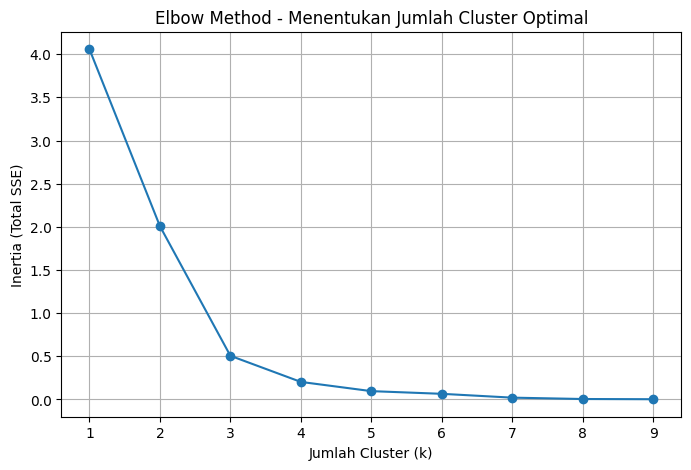

In [ ]:
inertia = []
range_k = range(1, 10)

for k in range_k:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled)
    inertia.append(model.inertia_)

# Visualisasi Elbow
plt.figure(figsize=(8, 5))
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method - Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (Total SSE)')
plt.grid(True)
plt.show()


Berdasarkan grafik Elbow, terlihat bahwa nilai inertia turun drastis dari k=1 sampai k=3, lalu setelah itu penurunannya mulai pelan atau mendatar. Titik di k=3 inilah yang disebut titik “tekukan” (elbow), dan itu artinya jumlah klaster yang paling pas adalah 3. Kalau jumlah klaster ditambah lebih dari 3, hasil pengelompokannya tidak jauh lebih baik, tapi model jadi lebih rumit. Jadi, memilih k=3 sudah cukup optimal untuk membagi pelanggan ke dalam kelompok yang jelas tanpa membuat model terlalu rumit.

###Build Model

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_df['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

Kode di atas berfungsi untuk membangun dan menjalankan model segmentasi pelanggan menggunakan algoritma KMeans Clustering.

In [ ]:
agglo = AgglomerativeClustering(n_clusters=3)
rfm_df['Agglo_Cluster'] = agglo.fit_predict(rfm_scaled)

Kode di atas berfungsi untuk menerapkan model segmentasi pelanggan menggunakan algoritma Agglomerative Clustering, yaitu salah satu metode hierarchical clustering.

###Begins and Compare Clusters

In [ ]:
kmeans_col = pd.DataFrame(rfm_df['KMeans_Cluster'].values, columns=["kmeans_cluster"])
agglo_col = pd.DataFrame(rfm_df['Agglo_Cluster'].values, columns=["hierarchy_cluster"])
x_final = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
combined_data_assoc = pd.concat([x_final, kmeans_col, agglo_col], axis=1)
combined_data_assoc

,Recency,Frequency,Monetary,kmeans_cluster,hierarchy_cluster
0,0.519481,0.000000,0.000238,0,0
1,0.584416,0.008791,0.004160,2,0
2,0.753247,0.000000,0.063423,2,2
3,1.000000,0.000000,0.000774,2,2
4,1.000000,0.000000,0.000265,2,2
5,0.376623,0.010989,0.001683,0,0
6,0.025974,0.156044,0.100863,0,0
7,0.740260,0.000000,0.001813,2,2
8,1.000000,0.002198,0.000697,2,2
9,0.025974,1.000000,1.000000,1,1


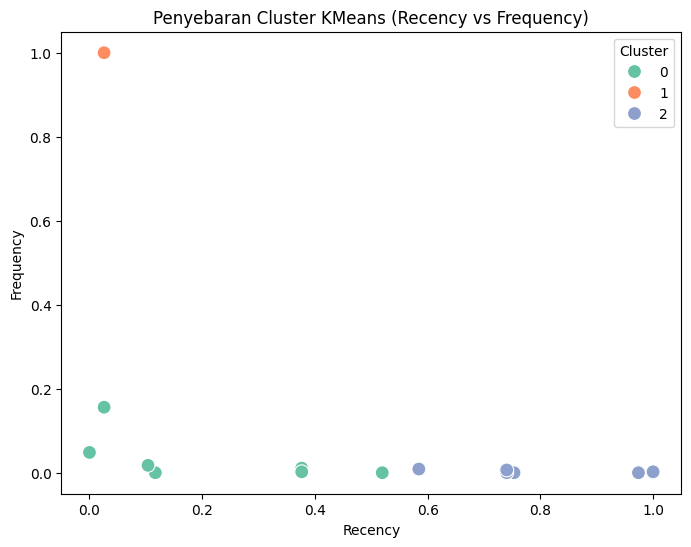

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=combined_data_assoc, x='Recency', y='Frequency', hue='kmeans_cluster', palette='Set2', s=100)
plt.title('Penyebaran Cluster KMeans (Recency vs Frequency)')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()

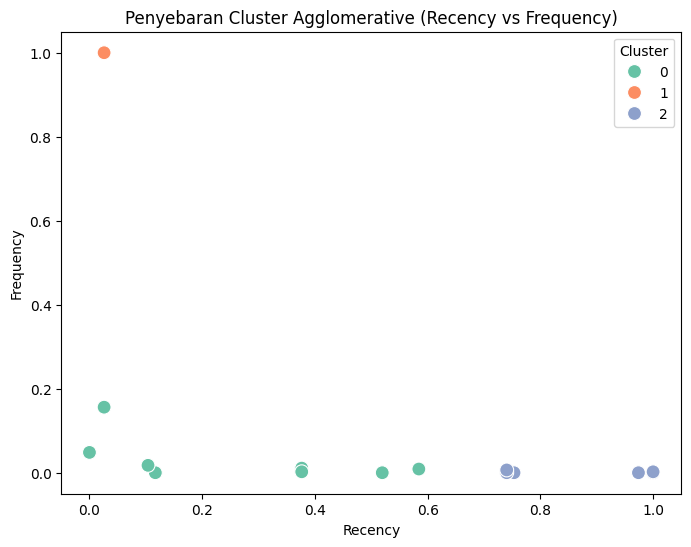

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=combined_data_assoc, x='Recency', y='Frequency', hue='hierarchy_cluster', palette='Set2', s=100)
plt.title('Penyebaran Cluster Agglomerative (Recency vs Frequency)')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()

Berdasarkan tampilan awal (baris 0–15), terlihat bahwa mayoritas pelanggan yang memiliki nilai RFM sangat rendah dikelompokkan ke dalam klaster 2 oleh KMeans. Sementara hasil dari hierarchical clustering menunjukkan variasi yang berbeda, seperti pelanggan di baris awal sebagian masuk klaster 0, dan lainnya ke 2, menandakan pendekatan pembagian klaster yang berbeda.

Cluster 0
```
Recency: Nilai Recency cenderung rendah hingga sedang (artinya pelanggan baru-baru ini melakukan pembelian atau tidak terlalu lama sejak transaksi terakhir).

Frequency: Frekuensi pembelian sedang hingga rendah, tapi ada yang cukup aktif (contoh: nilai frequency sampai 0.156044).

Monetary: Nilai pembelian relatif rendah sampai sedang.
Interpretasi: Cluster ini bisa disebut sebagai pelanggan Loyal yang cukup aktif melakukan pembelian secara berkala dengan nilai transaksi sedang. Mereka mungkin bukan pelanggan VIP, tapi sering melakukan pembelian dan penting untuk dipertahankan.
```

Cluster 1
```
Recency: Nilai Recency sangat rendah (0.025974), artinya pelanggan ini baru saja melakukan pembelian.

Frequency: Frekuensi pembelian sangat tinggi (1.000000), menunjukkan pelanggan ini sangat sering membeli.

Monetary: Nilai pembelian tertinggi di antara cluster lain (1.000000), artinya pelanggan ini memberikan kontribusi pendapatan terbesar.
Interpretasi: Cluster ini merupakan pelanggan VIP, yang sangat aktif dan memberikan nilai pembelian tinggi. Mereka adalah pelanggan paling berharga dan harus diprioritaskan dalam program loyalitas dan layanan khusus.
```
Cluster 2
```
Recency: Nilai Recency tinggi (mendekati 1), artinya pelanggan sudah lama tidak melakukan pembelian.

Frequency: Frekuensi pembelian sangat rendah.

Monetary: Nilai pembelian sangat rendah.
Interpretasi: Cluster ini adalah pelanggan Dorman (tidak aktif atau sudah lama tidak membeli). Mereka perlu diberikan perhatian khusus, misalnya dengan kampanye reaktivasi agar kembali melakukan pembelian.
```
Kesimpulan
```
Cluster 0: Pelanggan Loyal, pembelian rutin dengan nilai sedang.

Cluster 1: Pelanggan VIP, pembelian sangat sering dan bernilai tinggi.

Cluster 2:Pelanggan Dorman, jarang atau sudah lama tidak membeli.
```

In [ ]:
combined_data_assoc.to_csv('hasil_clustering.csv', index=False)

#**EVALUATION**

##Evaluate Results

In [ ]:
sil_kmeans = silhouette_score(rfm_scaled, rfm_df['KMeans_Cluster'])
ch_kmeans = calinski_harabasz_score(rfm_scaled, rfm_df['KMeans_Cluster'])
db_kmeans = davies_bouldin_score(rfm_scaled, rfm_df['KMeans_Cluster'])

sil_agglo = silhouette_score(rfm_scaled, rfm_df['Agglo_Cluster'])
ch_agglo = calinski_harabasz_score(rfm_scaled, rfm_df['Agglo_Cluster'])
db_agglo = davies_bouldin_score(rfm_scaled, rfm_df['Agglo_Cluster'])

evaluation = pd.DataFrame({
    'Silhouette Score': [sil_kmeans, sil_agglo],
    'Calinski-Harabasz Score': [ch_kmeans, ch_agglo],
    'Davies-Bouldin Score': [db_kmeans, db_agglo]
}, index=['KMeans', 'Agglomerative'])

def highlight_evaluation(df):
    return df.style \
        .highlight_max(axis=0, subset=['Silhouette Score', 'Calinski-Harabasz Score'], props='color: white; background-color: green;') \
        .highlight_min(axis=0, subset=['Davies-Bouldin Score'], props='color: white; background-color: green;')

highlight_evaluation(evaluation)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans,0.544558,45.585612,0.413301
Agglomerative,0.536405,41.715645,0.418064


Berdasarkan ketiga metrik evaluasi tersebut, model KMeans secara konsisten memberikan hasil yang lebih baik daripada Agglomerative Clustering, sehingga KMeans layak dipilih sebagai metode utama untuk segmentasi pelanggan pada analisis ini.

##Review Process

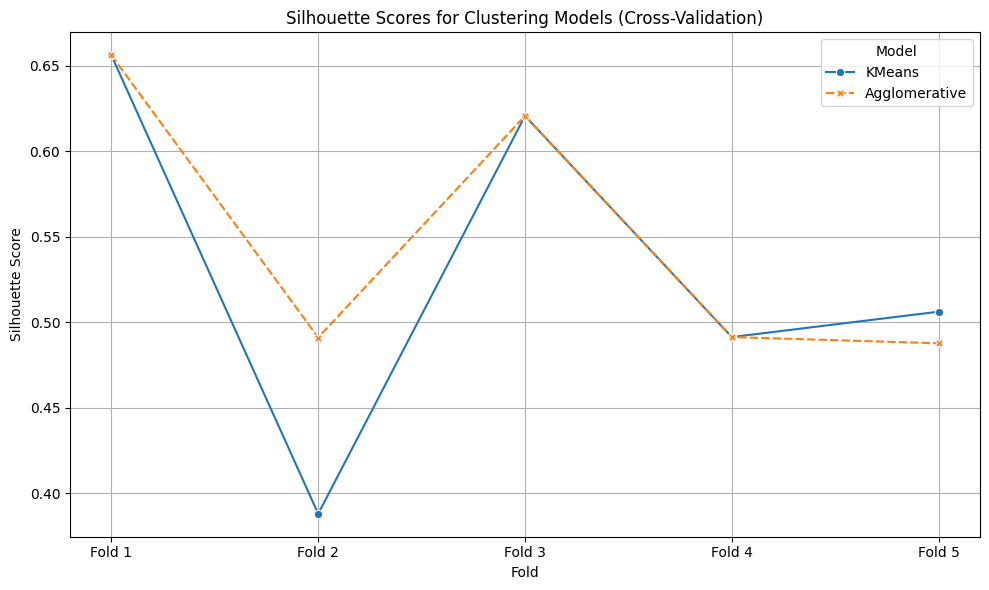

In [ ]:
from sklearn.model_selection import KFold
clustering_models = [KMeans(n_clusters=3, random_state=42), AgglomerativeClustering(n_clusters=3)]
clustering_names = ['KMeans', 'Agglomerative']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
silhouette_scores = []

for model in clustering_models:
    fold_scores = []
    for train_idx, _ in kf.split(rfm_scaled):
        X_fold = rfm_scaled[train_idx]
        model.fit(X_fold)
        try:
            labels = model.predict(X_fold)
        except:
            labels = model.labels_
        if len(set(labels)) > 1:
            sil = silhouette_score(X_fold, labels)
            fold_scores.append(sil)
        else:
            fold_scores.append(np.nan)
    silhouette_scores.append(fold_scores)

df_silhouette = pd.DataFrame(silhouette_scores, index=clustering_names).T

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_silhouette, markers=True)
plt.title('Silhouette Scores for Clustering Models (Cross-Validation)')
plt.xlabel('Fold')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.legend(title='Model', loc='best')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.tight_layout()
plt.show()

Berdasarkan hasil evaluasi menggunakan 5-Fold Cross Validation dengan metrik Silhouette Score, model Agglomerative Clustering menunjukkan performa yang lebih stabil dibandingkan KMeans, terutama karena nilainya tidak mengalami penurunan drastis seperti KMeans pada Fold 2. Namun, meskipun performa KMeans kurang stabil di beberapa fold, hasil evaluasi keseluruhan menunjukkan bahwa KMeans memiliki nilai rata-rata Silhouette Score yang lebih tinggi. Oleh karena itu, secara menyeluruh, KMeans tetap dipilih sebagai algoritma yang paling sesuai untuk segmentasi pelanggan pada data RFM yang digunakan.

##Determine Next Steps

Dari proses pemodelan dan evaluasi yang telah dilakukan, dapat disimpulkan bahwa model segmentasi berbasis RFM yang dibangun, khususnya dengan algoritma KMeans, memberikan hasil yang akurat dan stabil dalam mengelompokkan pelanggan ke dalam segmen yang bermakna. Hasil evaluasi menunjukkan bahwa model mampu membedakan perilaku pelanggan secara signifikan, sehingga layak diterapkan untuk mendukung strategi pemasaran dan distribusi perusahaan.

Tahapan selanjutnya adalah deployment, yaitu penerapan model segmentasi ini ke dalam lingkungan operasional perusahaan. Model akan digunakan untuk mengidentifikasi segmen pelanggan seperti VIP, Loyal, dan Dorman secara otomatis dari data transaksi terbaru. Selain itu, hasil segmentasi akan diintegrasikan ke dalam dashboard visualisasi agar tim penjualan, logistik, dan manajemen dapat dengan mudah memanfaatkan informasi klaster untuk pengambilan keputusan. Model ini juga akan dipantau secara berkala untuk memastikan performanya tetap optimal dan tetap relevan dengan perubahan perilaku pelanggan di masa mendatang.

In [ ]:
import pickle

with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

with open('scaler_rfm.pkl', 'wb') as f:
    pickle.dump(scaler, f)
